In [1]:
import pandas as pd
from pycaret.time_series import *
import matplotlib.pyplot as plt
import awswrangler as wr
import boto3
from pycaret import *

In [2]:
boto3.setup_default_session(profile_name='anthony_garove_fellow_dssgx_24')

bucket = "dssgx-munich-2024-bavarian-forest"
raw_data_folder = "raw-data"
preprocessed_data_folder = "preprocessed_data"

In [3]:
def load_csv_files_from_aws_s3(path: str, **kwargs) -> pd.DataFrame:
    """Loads individual or multiple CSV files from an AWS S3 bucket.
    Args:
        path (str): The path to the CSV files on AWS S3.
        **kwargs: Additional arguments to pass to the read_csv function.
    Returns:
        pd.DataFrame: The DataFrame containing the data from the CSV files.
    """
    df = wr.s3.read_csv(path=path, **kwargs)
    return df
df = load_csv_files_from_aws_s3(
    path="s3://dssgx-munich-2024-bavarian-forest/preprocessed_data/joined_sensor_weather_visitorcenter_2016-2024.csv"
)
df.head()

,Time,Bayerisch Eisenstein IN,Bayerisch Eisenstein OUT,Brechhäuslau IN,Brechhäuslau OUT,Deffernik IN,Deffernik OUT,Diensthüttenstraße IN,Diensthüttenstraße OUT,Felswandergebiet IN,...,Racheldiensthuette_geoeffnet,Waldschmidthaus_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Temperatur,Niederschlagsmenge,Schneehoehe,GS mit,GS max,Total
0,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Specify the columns to use
columns_to_use = [
    'Time',
    'traffic_norm',
    'traffic_abs',
    'Temperature (°C)',
    'Relative Humidity (%)',
    'Precipitation (mm)',
    'Wind Speed (km/h)',
    'Sunshine Duration (min)',
    'Monat',
    'Wochentag',
    'Wochenende',
    'Jahreszeit',
    'Laubfärbung',
    'Feiertag_Bayern',
    'Feiertag_CZ',
    'HEH_geoeffnet',
    'HZW_geoeffnet',
    'WGM_geoeffnet',
    'Lusenschutzhaus_geoeffnet',
    'Racheldiensthuette_geoeffnet',
    'Falkensteinschutzhaus_geoeffnet',
    'Schwellhaeusl_geoeffnet',
    'Schulferien_Bayern',
    'Schulferien_CZ',
    'Jahr'
]


In [5]:
# Filter the dataframe to only include the specified columns
df = df[columns_to_use]

# Display the first few rows to ensure the data is loaded correctly
df.head()

,Time,traffic_norm,traffic_abs,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (km/h),Sunshine Duration (min),Monat,Wochentag,...,HEH_geoeffnet,HZW_geoeffnet,WGM_geoeffnet,Lusenschutzhaus_geoeffnet,Racheldiensthuette_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Schulferien_Bayern,Schulferien_CZ,Jahr
0,2016-01-01 00:00:00,NaN,NaN,-1.4,96.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 01:00:00,NaN,NaN,-1.4,97.0,0.0,2.9,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 02:00:00,NaN,NaN,-1.3,95.0,0.0,2.5,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01 03:00:00,NaN,NaN,-1.4,98.0,0.0,2.5,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 04:00:00,NaN,NaN,-1.3,100.0,0.0,3.6,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Specify the data types
dtype_dict = {
    'Time': 'datetime64[ns]',
    'traffic_norm': 'float64',
    'traffic_abs': 'float64',
    'Temperature (°C)': 'float64',
    'Relative Humidity (%)': 'float64',
    'Precipitation (mm)': 'float64',
    'Wind Speed (km/h)': 'float64',
    'Sunshine Duration (min)': 'float64',
    'Monat': 'float64',
    'Wochentag': 'category',
    'Wochenende': 'category',
    'Jahreszeit': 'category',
    'Laubfärbung': 'category',
    'Feiertag_Bayern': 'category',
    'Feiertag_CZ': 'category',
    'HEH_geoeffnet': 'category',
    'HZW_geoeffnet': 'category',
    'WGM_geoeffnet': 'category',
    'Lusenschutzhaus_geoeffnet': 'category',
    'Racheldiensthuette_geoeffnet': 'category',
    'Falkensteinschutzhaus_geoeffnet': 'category',
    'Schwellhaeusl_geoeffnet': 'category',
    'Schulferien_Bayern': 'category',
    'Schulferien_CZ': 'category',
    'Jahr': 'float64'
}

# Apply the data types to the dataframe
df = df.astype(dtype_dict)

# Set 'Time' as the index
df.set_index('Time', inplace=True)



In [7]:
# Slice the data from January 1, 2023, to August 19, 2024
df = df.loc['2023-01-01':'2024-08-19']
# Display the info to check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14328 entries, 2023-01-01 00:00:00 to 2024-08-19 23:00:00
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   traffic_norm                     14315 non-null  float64 
 1   traffic_abs                      14328 non-null  float64 
 2   Temperature (°C)                 14328 non-null  float64 
 3   Relative Humidity (%)            14328 non-null  float64 
 4   Precipitation (mm)               14328 non-null  float64 
 5   Wind Speed (km/h)                14328 non-null  float64 
 6   Sunshine Duration (min)          14328 non-null  float64 
 7   Monat                            14328 non-null  float64 
 8   Wochentag                        14328 non-null  category
 9   Wochenende                       14328 non-null  category
 10  Jahreszeit                       14328 non-null  category
 11  Laubfärbung                     

In [8]:
df

,traffic_norm,traffic_abs,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (km/h),Sunshine Duration (min),Monat,Wochentag,Wochenende,...,HEH_geoeffnet,HZW_geoeffnet,WGM_geoeffnet,Lusenschutzhaus_geoeffnet,Racheldiensthuette_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Schulferien_Bayern,Schulferien_CZ,Jahr
Time,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,6.632653,65.0,6.4,82.0,0.0,9.0,0.0,1.0,Sonntag,True,...,True,True,True,True,False,True,True,True,True,2023.0
2023-01-01 01:00:00,10.612245,104.0,6.0,84.0,0.0,8.3,0.0,1.0,Sonntag,True,...,True,True,True,True,False,True,True,True,True,2023.0
2023-01-01 02:00:00,0.510204,5.0,6.1,83.0,0.0,7.6,0.0,1.0,Sonntag,True,...,True,True,True,True,False,True,True,True,True,2023.0
2023-01-01 03:00:00,0.000000,0.0,6.6,83.0,0.0,7.9,0.0,1.0,Sonntag,True,...,True,True,True,True,False,True,True,True,True,2023.0
2023-01-01 04:00:00,0.102041,1.0,6.4,83.0,0.0,7.6,0.0,1.0,Sonntag,True,...,True,True,True,True,False,True,True,True,True,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 19:00:00,6.738544,25.0,17.6,76.0,0.0,9.4,0.0,8.0,Montag,False,...,True,True,False,True,True,True,True,True,True,2024.0
2024-08-19 20:00:00,2.156334,8.0,17.4,77.0,0.0,9.0,0.0,8.0,Montag,False,...,True,True,False,True,True,True,True,True,True,2024.0
2024-08-19 21:00:00,0.000000,0.0,16.3,82.0,0.0,8.6,0.0,8.0,Montag,False,...,True,True,False,True,True,True,True,True,True,2024.0


In [9]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

traffic_norm    13
dtype: int64


In [10]:
df_cleaned = df.drop(columns=['traffic_norm'])
df_cleaned = df_cleaned.asfreq('H')  # Set the frequency explicitly
df_cleaned.index


DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2024-08-19 14:00:00', '2024-08-19 15:00:00',
               '2024-08-19 16:00:00', '2024-08-19 17:00:00',
               '2024-08-19 18:00:00', '2024-08-19 19:00:00',
               '2024-08-19 20:00:00', '2024-08-19 21:00:00',
               '2024-08-19 22:00:00', '2024-08-19 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=14328, freq='H')

In [11]:
df_cleaned.iloc[0]

traffic_abs                           65.0
Temperature (°C)                       6.4
Relative Humidity (%)                 82.0
Precipitation (mm)                     0.0
Wind Speed (km/h)                      9.0
Sunshine Duration (min)                0.0
Monat                                  1.0
Wochentag                          Sonntag
Wochenende                            True
Jahreszeit                          Winter
Laubfärbung                          False
Feiertag_Bayern                       True
Feiertag_CZ                           True
HEH_geoeffnet                         True
HZW_geoeffnet                         True
WGM_geoeffnet                         True
Lusenschutzhaus_geoeffnet             True
Racheldiensthuette_geoeffnet         False
Falkensteinschutzhaus_geoeffnet       True
Schwellhaeusl_geoeffnet               True
Schulferien_Bayern                    True
Schulferien_CZ                        True
Jahr                                2023.0
Name: 2023-

In [12]:
df_cleaned.columns

Index(['traffic_abs', 'Temperature (°C)', 'Relative Humidity (%)',
       'Precipitation (mm)', 'Wind Speed (km/h)', 'Sunshine Duration (min)',
       'Monat', 'Wochentag', 'Wochenende', 'Jahreszeit', 'Laubfärbung',
       'Feiertag_Bayern', 'Feiertag_CZ', 'HEH_geoeffnet', 'HZW_geoeffnet',
       'WGM_geoeffnet', 'Lusenschutzhaus_geoeffnet',
       'Racheldiensthuette_geoeffnet', 'Falkensteinschutzhaus_geoeffnet',
       'Schwellhaeusl_geoeffnet', 'Schulferien_Bayern', 'Schulferien_CZ',
       'Jahr'],
      dtype='object')

In [13]:
# Define the target variable
target = 'traffic_abs'

numeric_features =['Temperature (°C)', 'Relative Humidity (%)',
       'Precipitation (mm)', 'Wind Speed (km/h)', 'Sunshine Duration (min)']

# Initialize the PyCaret setup
ts_setup = setup(
    data=df_cleaned,  # Use the cleaned data
    target=target,
    
    #index='Time',  # Specify that 'Time' is the index
    session_id=42,  # For reproducibility
    #seasonal_period='auto',  # Let PyCaret automatically detect the seasonal period
    #fold_strategy='timeseries',  # Use time series cross-validation
    fold=3,  # Number of folds in time series cross-validation
    fh=24 * 14,  # Forecast horizon of 2 weeks (24 hours * 14 days)
    verbose=True  # Show detailed logs for debugging
)

# Compare models and select the best one
best_model = compare_models()

# Save the best model
save_model(best_model, 'best_model_traffic_abs')

print("Best model for traffic_abs saved.")

,Description,Value
0,session_id,42
1,Target,traffic_abs
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(14328, 23)"
5,Transformed data shape,"(14328, 23)"
6,Transformed train set shape,"(13992, 23)"
7,Transformed test set shape,"(336, 23)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
croston,Croston,2.5492,1.4409,171.9008,224.2815,108133798183391616.0000,1.2782,-0.0550,1.3733


Transformation Pipeline and Model Successfully Saved
Best model for traffic_abs saved.


In [14]:
df.columns

Index(['traffic_norm', 'traffic_abs', 'Temperature (°C)',
       'Relative Humidity (%)', 'Precipitation (mm)', 'Wind Speed (km/h)',
       'Sunshine Duration (min)', 'Monat', 'Wochentag', 'Wochenende',
       'Jahreszeit', 'Laubfärbung', 'Feiertag_Bayern', 'Feiertag_CZ',
       'HEH_geoeffnet', 'HZW_geoeffnet', 'WGM_geoeffnet',
       'Lusenschutzhaus_geoeffnet', 'Racheldiensthuette_geoeffnet',
       'Falkensteinschutzhaus_geoeffnet', 'Schwellhaeusl_geoeffnet',
       'Schulferien_Bayern', 'Schulferien_CZ', 'Jahr'],
      dtype='object')

In [15]:
df["Hour"] = df.index.hour
df



,traffic_norm,traffic_abs,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (km/h),Sunshine Duration (min),Monat,Wochentag,Wochenende,...,HZW_geoeffnet,WGM_geoeffnet,Lusenschutzhaus_geoeffnet,Racheldiensthuette_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Schulferien_Bayern,Schulferien_CZ,Jahr,Hour
Time,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,6.632653,65.0,6.4,82.0,0.0,9.0,0.0,1.0,Sonntag,True,...,True,True,True,False,True,True,True,True,2023.0,0
2023-01-01 01:00:00,10.612245,104.0,6.0,84.0,0.0,8.3,0.0,1.0,Sonntag,True,...,True,True,True,False,True,True,True,True,2023.0,1
2023-01-01 02:00:00,0.510204,5.0,6.1,83.0,0.0,7.6,0.0,1.0,Sonntag,True,...,True,True,True,False,True,True,True,True,2023.0,2
2023-01-01 03:00:00,0.000000,0.0,6.6,83.0,0.0,7.9,0.0,1.0,Sonntag,True,...,True,True,True,False,True,True,True,True,2023.0,3
2023-01-01 04:00:00,0.102041,1.0,6.4,83.0,0.0,7.6,0.0,1.0,Sonntag,True,...,True,True,True,False,True,True,True,True,2023.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 19:00:00,6.738544,25.0,17.6,76.0,0.0,9.4,0.0,8.0,Montag,False,...,True,False,True,True,True,True,True,True,2024.0,19
2024-08-19 20:00:00,2.156334,8.0,17.4,77.0,0.0,9.0,0.0,8.0,Montag,False,...,True,False,True,True,True,True,True,True,2024.0,20
2024-08-19 21:00:00,0.000000,0.0,16.3,82.0,0.0,8.6,0.0,8.0,Montag,False,...,True,False,True,True,True,True,True,True,2024.0,21


In [16]:
from pycaret.regression import *

# Define the target variables
targets = ['traffic_norm', 'traffic_abs']

numeric_features = ['Temperature (°C)',
       'Relative Humidity (%)', 'Precipitation (mm)', 'Wind Speed (km/h)',
       'Sunshine Duration (min)']
catgorical_features =['Hour','Monat', 'Wochentag', 'Wochenende',
       'Jahreszeit', 'Laubfärbung', 'Feiertag_Bayern', 'Feiertag_CZ',
       'HEH_geoeffnet', 'HZW_geoeffnet', 'WGM_geoeffnet',
       'Lusenschutzhaus_geoeffnet', 'Racheldiensthuette_geoeffnet',
       'Falkensteinschutzhaus_geoeffnet', 'Schwellhaeusl_geoeffnet',
       'Schulferien_Bayern', 'Schulferien_CZ', 'Jahr']

for catfeature in catgorical_features:
    df[catfeature] = df[catfeature].astype(str)



# Loop through each target
for target in targets:
    print(f"\nModeling for target: {target}\n")

    cols_for_modeling = [target] + numeric_features + catgorical_features
    
    # Initialize the PyCaret setup
    ts_setup = setup(
        data=df.dropna(subset="traffic_norm")[cols_for_modeling],
        target=target,
        train_size=0.9,
        session_id=42,  # For reproducibility
       # seasonal_period=24,  # Assumes daily seasonality for hourly data
       # fold_strategy='timeseries',  # Use time series cross-validation
        data_split_shuffle=True,
        fold=3,  # Number of folds in time series cross-validation
        #fh=24 * 14,  # Forecast horizon of 2 weeks (24 hours * 14 days)
        numeric_features=numeric_features,
        categorical_features=catgorical_features,
        verbose=False  # Suppress output for clarity
    )
    
    # Compare models and select the best one
    best_model = compare_models()
    
    # Save the best model
    save_model(best_model, f'best_model_{target}')

    print(f"Best model for {target} saved.\n")



Modeling for target: traffic_norm



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,2.9938,35.7358,5.9768,0.8666,0.5028,1.9291,1.8667
lightgbm,Light Gradient Boosting Machine,3.0560,38.1402,6.1741,0.8576,0.4871,1.6943,0.3833
et,Extra Trees Regressor,2.8594,39.0036,6.2436,0.8544,0.3790,0.8869,1.3700
xgboost,Extreme Gradient Boosting,3.2129,43.9642,6.6282,0.8359,0.4688,1.5565,0.8567
rf,Random Forest Regressor,3.2745,48.6475,6.9729,0.8184,0.4344,1.1150,1.4033
gbr,Gradient Boosting Regressor,4.1353,60.3001,7.7638,0.7749,0.6533,2.9352,0.7967
lr,Linear Regression,6.5220,95.0861,9.7505,0.6449,1.1237,10.0270,2.0133
ridge,Ridge Regression,6.5188,95.0824,9.7503,0.6449,1.1231,10.0138,2.3100
br,Bayesian Ridge,6.5116,95.0823,9.7503,0.6449,1.1217,9.9827,0.2100
dt,Decision Tree Regressor,4.3923,99.9393,9.9899,0.6272,0.5438,1.2787,0.2833


Transformation Pipeline and Model Successfully Saved
Best model for traffic_norm saved.


Modeling for target: traffic_abs



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,39.7370,5822.0239,76.2995,0.8931,1.2367,1.6534,1.8467
lightgbm,Light Gradient Boosting Machine,41.9017,6672.2434,81.6791,0.8775,1.1931,1.5872,0.3700
xgboost,Extreme Gradient Boosting,42.4680,7200.6263,84.8542,0.8678,1.0451,1.2969,0.4067
et,Extra Trees Regressor,39.9722,7438.4186,86.2349,0.8635,0.6903,0.8407,1.2367
rf,Random Forest Regressor,44.9007,8720.2885,93.3737,0.8400,0.7461,1.0653,1.2567
gbr,Gradient Boosting Regressor,56.6341,10788.6384,103.8599,0.8020,1.4756,2.6114,0.6867
dt,Decision Tree Regressor,60.3838,17471.0565,132.0101,0.6799,0.8921,1.2401,0.2167
lr,Linear Regression,88.5635,17665.4773,132.9047,0.6758,2.2323,8.1296,0.1900
ridge,Ridge Regression,88.5240,17664.7883,132.9020,0.6758,2.2317,8.1226,0.1767
br,Bayesian Ridge,88.4520,17665.0369,132.9026,0.6758,2.2300,8.1096,0.1933


Transformation Pipeline and Model Successfully Saved
Best model for traffic_abs saved.



In [17]:
model = create_model("et")



,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:56:46
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,40.5866,7563.0638,86.9659,0.8646,0.6936,0.7970
1,39.1776,7102.1501,84.2743,0.8666,0.6876,0.8493
2,40.1523,7650.0420,87.4645,0.8593,0.6896,0.8758
Mean,39.9722,7438.4186,86.2349,0.8635,0.6903,0.8407
Std,0.5892,240.4145,1.4012,0.0031,0.0025,0.0327


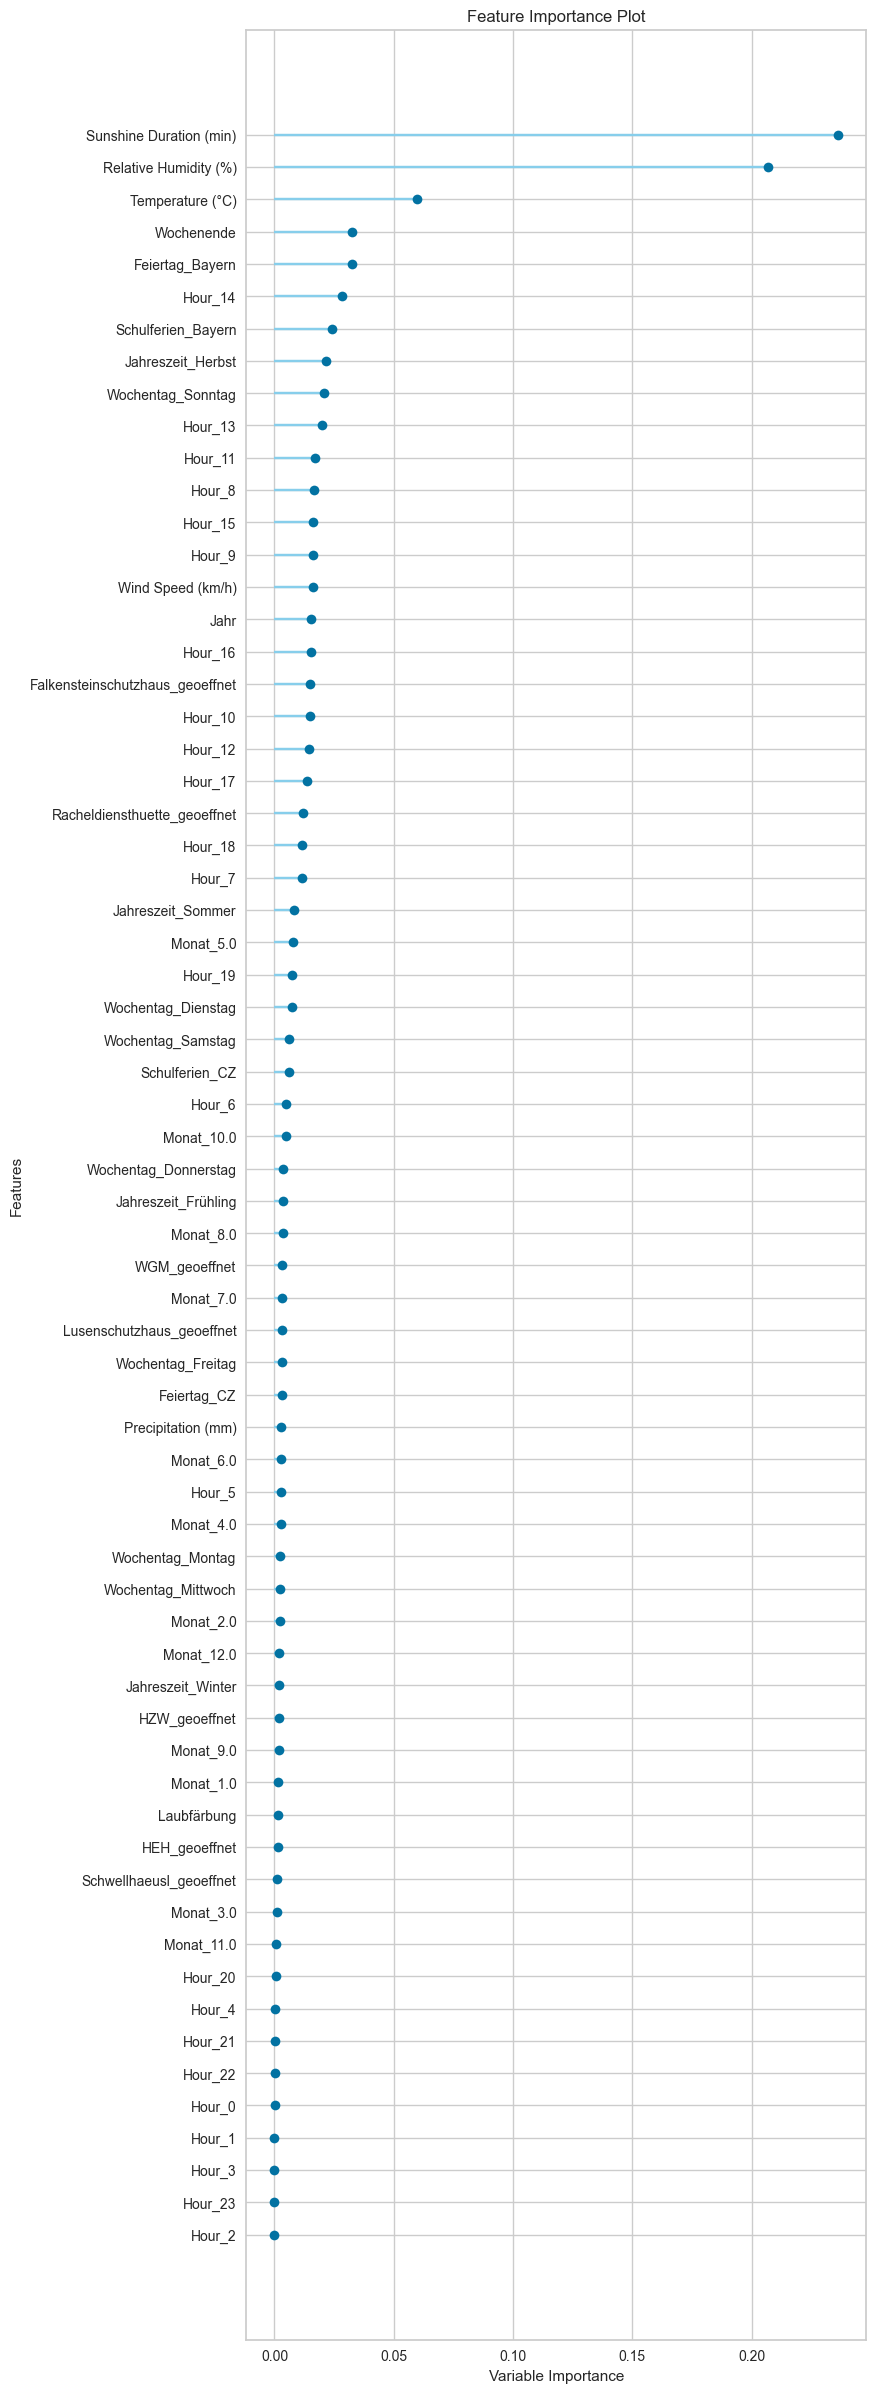

In [18]:
plot_model(model, plot = 'feature_all')

In [19]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [20]:
pred_holdout = predict_model(model)
pred_holdout

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,38.9949,6728.4197,82.0269,0.8798,0.6794,0.7501


,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (km/h),Sunshine Duration (min),Hour,Monat,Wochentag,Wochenende,Jahreszeit,...,WGM_geoeffnet,Lusenschutzhaus_geoeffnet,Racheldiensthuette_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Schulferien_Bayern,Schulferien_CZ,Jahr,traffic_abs,prediction_label
Time,,,,,,,,,,,,,,,,,,,,,
2024-02-22 19:00:00,6.900000,91.0,1.2,17.600000,0.0,19,2.0,Donnerstag,False,Winter,...,True,False,False,False,False,False,False,2024.0,0.0,2.06
2024-06-26 11:00:00,23.600000,67.0,0.0,10.800000,60.0,11,6.0,Mittwoch,False,Sommer,...,True,True,True,True,True,False,False,2024.0,424.0,352.99
2024-05-04 00:00:00,9.400000,86.0,0.0,6.500000,0.0,0,5.0,Samstag,True,Frühling,...,True,True,True,True,True,False,False,2024.0,0.0,1.40
2023-03-07 19:00:00,1.200000,64.0,0.0,13.700000,0.0,19,3.0,Dienstag,False,Frühling,...,True,False,False,False,True,False,False,2023.0,6.0,11.82
2024-06-08 22:00:00,15.900000,96.0,0.3,14.000000,0.0,22,6.0,Samstag,True,Sommer,...,True,True,True,True,True,False,False,2024.0,1.0,4.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05 23:00:00,15.300000,78.0,0.0,8.300000,0.0,23,8.0,Montag,False,Sommer,...,False,True,True,True,True,True,True,2024.0,0.0,2.85
2023-10-29 10:00:00,15.900000,56.0,0.0,14.800000,60.0,10,10.0,Sonntag,True,Herbst,...,True,True,True,True,True,False,False,2023.0,979.0,1018.16
2023-03-15 14:00:00,2.900000,68.0,0.0,19.100000,0.0,14,3.0,Mittwoch,False,Frühling,...,True,False,False,False,True,False,False,2023.0,165.0,109.09


In [21]:
import plotly.express as px

predictions_vs_real = pred_holdout[["traffic_abs", "prediction_label"]].sort_index(ascending=True)
px.line(predictions_vs_real)

In [22]:
daily_prediction_comparison = predictions_vs_real.resample("1d").sum()
daily_prediction_comparison["mae"] = abs(daily_prediction_comparison["traffic_abs"] - daily_prediction_comparison["prediction_label"])

print(f"The MAE on a daily basis is {daily_prediction_comparison.mae.mean()}.")
px.line(daily_prediction_comparison[["traffic_abs", "prediction_label"]])

The MAE on a daily basis is 83.9447068676717.


In [23]:
print(f"On average, {daily_prediction_comparison.traffic_abs.mean()} people are visiting the park daily.")

On average, 336.5293273925781 people are visiting the park daily.


In [24]:
px.box(daily_prediction_comparison["mae"])

In [25]:
high_error_dates = daily_prediction_comparison["mae"].sort_values(ascending=False).head(50)
high_error_dates

Time
2023-10-30    887.72
2024-03-30    791.07
2024-07-28    743.38
2023-08-14    675.19
2024-08-11    668.58
2023-08-15    659.39
2024-07-07    653.37
2023-08-13    636.86
2023-05-06    621.27
2023-12-24    571.73
2023-11-22    512.18
2024-05-19    503.72
2023-10-02    487.64
2023-10-31    487.58
2024-06-02    484.62
2024-05-05    465.26
2024-03-28    450.26
2023-05-18    447.59
2023-07-22    442.85
2023-06-24    434.54
2024-05-20    434.08
2023-08-02    427.26
2023-08-18    423.81
2023-06-23    419.33
2023-10-08    415.40
2023-10-07    414.06
2023-12-23    385.86
2024-08-02    382.06
2023-05-23    379.72
2023-07-27    374.07
2024-03-10    373.81
2024-02-18    350.60
2024-05-17    348.76
2024-02-10    347.00
2023-07-20    344.49
2023-04-14    342.73
2024-08-13    332.89
2024-04-02    329.31
2023-05-05    324.71
2024-08-08    322.66
2024-05-29    317.27
2024-02-05    312.81
2023-08-12    312.63
2024-01-30    308.81
2023-04-16    295.71
2023-09-29    279.19
2024-05-09    278.18
2023-01-

In [26]:
X_train = get_config('X_train')
X_train_columns = X_train.columns.to_list()
X_train_columns

['Temperature (°C)',
 'Relative Humidity (%)',
 'Precipitation (mm)',
 'Wind Speed (km/h)',
 'Sunshine Duration (min)',
 'Hour',
 'Monat',
 'Wochentag',
 'Wochenende',
 'Jahreszeit',
 'Laubfärbung',
 'Feiertag_Bayern',
 'Feiertag_CZ',
 'HEH_geoeffnet',
 'HZW_geoeffnet',
 'WGM_geoeffnet',
 'Lusenschutzhaus_geoeffnet',
 'Racheldiensthuette_geoeffnet',
 'Falkensteinschutzhaus_geoeffnet',
 'Schwellhaeusl_geoeffnet',
 'Schulferien_Bayern',
 'Schulferien_CZ',
 'Jahr']

In [27]:
df

,traffic_norm,traffic_abs,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (km/h),Sunshine Duration (min),Monat,Wochentag,Wochenende,...,HZW_geoeffnet,WGM_geoeffnet,Lusenschutzhaus_geoeffnet,Racheldiensthuette_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Schulferien_Bayern,Schulferien_CZ,Jahr,Hour
Time,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,6.632653,65.0,6.4,82.0,0.0,9.0,0.0,1.0,Sonntag,True,...,True,True,True,False,True,True,True,True,2023.0,0
2023-01-01 01:00:00,10.612245,104.0,6.0,84.0,0.0,8.3,0.0,1.0,Sonntag,True,...,True,True,True,False,True,True,True,True,2023.0,1
2023-01-01 02:00:00,0.510204,5.0,6.1,83.0,0.0,7.6,0.0,1.0,Sonntag,True,...,True,True,True,False,True,True,True,True,2023.0,2
2023-01-01 03:00:00,0.000000,0.0,6.6,83.0,0.0,7.9,0.0,1.0,Sonntag,True,...,True,True,True,False,True,True,True,True,2023.0,3
2023-01-01 04:00:00,0.102041,1.0,6.4,83.0,0.0,7.6,0.0,1.0,Sonntag,True,...,True,True,True,False,True,True,True,True,2023.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 19:00:00,6.738544,25.0,17.6,76.0,0.0,9.4,0.0,8.0,Montag,False,...,True,False,True,True,True,True,True,True,2024.0,19
2024-08-19 20:00:00,2.156334,8.0,17.4,77.0,0.0,9.0,0.0,8.0,Montag,False,...,True,False,True,True,True,True,True,True,2024.0,20
2024-08-19 21:00:00,0.000000,0.0,16.3,82.0,0.0,8.6,0.0,8.0,Montag,False,...,True,False,True,True,True,True,True,True,2024.0,21


In [28]:
X_train

,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (km/h),Sunshine Duration (min),Hour,Monat,Wochentag,Wochenende,Jahreszeit,...,HEH_geoeffnet,HZW_geoeffnet,WGM_geoeffnet,Lusenschutzhaus_geoeffnet,Racheldiensthuette_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Schulferien_Bayern,Schulferien_CZ,Jahr
Time,,,,,,,,,,,,,,,,,,,,,
2023-12-06 16:00:00,1.000000,93.0,0.1,14.4,0.0,16,12.0,Mittwoch,False,Winter,...,False,False,True,False,False,False,False,False,False,2023.0
2023-10-26 08:00:00,10.100000,82.0,0.0,17.6,0.0,8,10.0,Donnerstag,False,Herbst,...,True,True,True,True,True,True,True,False,True,2023.0
2023-08-02 11:00:00,16.799999,76.0,0.1,22.0,0.0,11,8.0,Mittwoch,False,Sommer,...,True,True,True,True,True,True,True,True,True,2023.0
2023-03-17 07:00:00,1.100000,62.0,0.0,10.8,18.0,7,3.0,Freitag,False,Frühling,...,True,True,True,True,False,True,True,False,False,2023.0
2023-02-09 01:00:00,-8.200000,78.0,0.0,9.7,0.0,1,2.0,Donnerstag,False,Winter,...,True,True,True,False,False,False,True,False,False,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-05 07:00:00,15.900000,84.0,0.0,13.0,0.0,7,8.0,Samstag,True,Sommer,...,True,True,True,True,True,True,True,True,True,2023.0
2024-07-13 09:00:00,18.700001,71.0,0.0,13.0,30.0,9,7.0,Samstag,True,Sommer,...,True,True,True,True,True,True,True,False,True,2024.0
2023-08-13 14:00:00,26.000000,62.0,0.0,7.9,21.0,14,8.0,Sonntag,True,Sommer,...,True,True,True,True,True,True,True,True,True,2023.0


In [29]:
start_date = "2024-08-30 00:00"
end_date = "2024-09-07 23:00"

inference_index = pd.date_range(
    start=pd.to_datetime(start_date),
    end=pd.to_datetime(end_date),
    freq="1h"
)

inference_df = pd.DataFrame(
    index=inference_index,
    columns=X_train_columns
)


inference_df["Hour"] = inference_df.index.hour
inference_df["Monat"] = inference_df.index.month
inference_df["Jahr"] = inference_df.index.year
inference_df


,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (km/h),Sunshine Duration (min),Hour,Monat,Wochentag,Wochenende,Jahreszeit,...,HEH_geoeffnet,HZW_geoeffnet,WGM_geoeffnet,Lusenschutzhaus_geoeffnet,Racheldiensthuette_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Schulferien_Bayern,Schulferien_CZ,Jahr
2024-08-30 00:00:00,NaN,NaN,NaN,NaN,NaN,0,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
2024-08-30 01:00:00,NaN,NaN,NaN,NaN,NaN,1,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
2024-08-30 02:00:00,NaN,NaN,NaN,NaN,NaN,2,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
2024-08-30 03:00:00,NaN,NaN,NaN,NaN,NaN,3,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
2024-08-30 04:00:00,NaN,NaN,NaN,NaN,NaN,4,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-07 19:00:00,NaN,NaN,NaN,NaN,NaN,19,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
2024-09-07 20:00:00,NaN,NaN,NaN,NaN,NaN,20,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
2024-09-07 21:00:00,NaN,NaN,NaN,NaN,NaN,21,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
2024-09-07 22:00:00,NaN,NaN,NaN,NaN,NaN,22,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024


In [30]:
def load_csv_files_from_aws_s3(path: str, **kwargs) -> pd.DataFrame:
    """Loads individual or multiple CSV files from an AWS S3 bucket.
    Args:
        path (str): The path to the CSV files on AWS S3.
        **kwargs: Additional arguments to pass to the read_csv function.
    Returns:
        pd.DataFrame: The DataFrame containing the data from the CSV files.
    """
    df2 = wr.s3.read_csv(path=path, **kwargs)
    return df2
df2 = load_csv_files_from_aws_s3(
    path="s3://dssgx-munich-2024-bavarian-forest/preprocessed_data/df_visitcenters_hourly.csv"
)

df2.tail()

,Time,Tag,Monat,Jahr,Wochentag,Wochenende,Jahreszeit,Laubfärbung,Besuchszahlen_HEH,Besuchszahlen_HZW,...,Lusenschutzhaus_geoeffnet,Racheldiensthuette_geoeffnet,Waldschmidthaus_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Temperatur,Niederschlagsmenge,Schneehoehe,GS mit,GS max
70123,2024-12-31 19:00:00,31,12.0,2024,Dienstag,False,Winter,True,NaN,NaN,...,True,True,NaN,True,True,NaN,NaN,NaN,NaN,NaN
70124,2024-12-31 20:00:00,31,12.0,2024,Dienstag,False,Winter,True,NaN,NaN,...,True,True,NaN,True,True,NaN,NaN,NaN,NaN,NaN
70125,2024-12-31 21:00:00,31,12.0,2024,Dienstag,False,Winter,True,NaN,NaN,...,True,True,NaN,True,True,NaN,NaN,NaN,NaN,NaN
70126,2024-12-31 22:00:00,31,12.0,2024,Dienstag,False,Winter,True,NaN,NaN,...,True,True,NaN,True,True,NaN,NaN,NaN,NaN,NaN
70127,2024-12-31 23:00:00,31,12.0,2024,Dienstag,False,Winter,True,NaN,NaN,...,True,True,NaN,True,True,NaN,NaN,NaN,NaN,NaN


In [31]:
print(df2.columns)

Index(['Time', 'Tag', 'Monat', 'Jahr', 'Wochentag', 'Wochenende', 'Jahreszeit',
       'Laubfärbung', 'Besuchszahlen_HEH', 'Besuchszahlen_HZW',
       'Besuchszahlen_WGM', 'Parkpl_HEH_PKW', 'Parkpl_HEH_BUS',
       'Parkpl_HZW_PKW', 'Parkpl_HZW_BUS', 'Schulferien_Bayern',
       'Schulferien_CZ', 'Feiertag_Bayern', 'Feiertag_CZ', 'HEH_geoeffnet',
       'HZW_geoeffnet', 'WGM_geoeffnet', 'Lusenschutzhaus_geoeffnet',
       'Racheldiensthuette_geoeffnet', 'Waldschmidthaus_geoeffnet',
       'Falkensteinschutzhaus_geoeffnet', 'Schwellhaeusl_geoeffnet',
       'Temperatur', 'Niederschlagsmenge', 'Schneehoehe', 'GS mit', 'GS max'],
      dtype='object')


In [32]:
# Convert the Time column in df2 to datetime
df2['Time'] = pd.to_datetime(df2['Time'])

# Set the Time column as the index of df2
df2.set_index('Time', inplace=True)

# Identify common columns between df2 and inference_df
common_columns = df2.columns.intersection(inference_df.columns)

# Merge df2 into inference_df on the datetime index and common columns
inference_df.update(df2[common_columns])


In [33]:
inference_df.tail()

,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (km/h),Sunshine Duration (min),Hour,Monat,Wochentag,Wochenende,Jahreszeit,...,HEH_geoeffnet,HZW_geoeffnet,WGM_geoeffnet,Lusenschutzhaus_geoeffnet,Racheldiensthuette_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Schulferien_Bayern,Schulferien_CZ,Jahr
2024-09-07 19:00:00,NaN,NaN,NaN,NaN,NaN,19,9,Samstag,True,Herbst,...,True,True,True,True,True,True,True,True,False,2024
2024-09-07 20:00:00,NaN,NaN,NaN,NaN,NaN,20,9,Samstag,True,Herbst,...,True,True,True,True,True,True,True,True,False,2024
2024-09-07 21:00:00,NaN,NaN,NaN,NaN,NaN,21,9,Samstag,True,Herbst,...,True,True,True,True,True,True,True,True,False,2024
2024-09-07 22:00:00,NaN,NaN,NaN,NaN,NaN,22,9,Samstag,True,Herbst,...,True,True,True,True,True,True,True,True,False,2024
2024-09-07 23:00:00,NaN,NaN,NaN,NaN,NaN,23,9,Samstag,True,Herbst,...,True,True,True,True,True,True,True,True,False,2024


In [34]:
def load_csv_files_from_aws_s3(path: str, **kwargs) -> pd.DataFrame:
    """Loads individual or multiple CSV files from an AWS S3 bucket.
    Args:
        path (str): The path to the CSV files on AWS S3.
        **kwargs: Additional arguments to pass to the read_csv function.
    Returns:
        pd.DataFrame: The DataFrame containing the data from the CSV files.
    """
    df3 = wr.s3.read_csv(path=path, **kwargs)
    return df3
df3 = load_csv_files_from_aws_s3(
    path="s3://dssgx-munich-2024-bavarian-forest/preprocessed_data/processed_weather_data_inference_df.csv"
)

df3.tail()

,Time,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (km/h),Sunshine Duration (min)
828,2024-09-04 12:00:00,20.8,57.0,0.0,13.0,4.0
829,2024-09-04 13:00:00,21.2,55.0,0.0,13.0,4.0
830,2024-09-04 14:00:00,21.3,54.0,0.0,11.1,4.0
831,2024-09-04 15:00:00,21.4,54.0,0.0,11.1,4.0
832,2024-09-04 16:00:00,20.7,57.0,0.0,9.3,4.0


In [35]:
# Convert the Time column in df2 to datetime
df3['Time'] = pd.to_datetime(df3['Time'])

# Set the Time column as the index of df2
df3.set_index('Time', inplace=True)

# Identify common columns between df2 and inference_df
common_columns2 = df3.columns.intersection(inference_df.columns)

# Merge df2 into inference_df on the datetime index and common columns
inference_df.update(df3[common_columns2])

In [36]:
inference_df.tail()

,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (km/h),Sunshine Duration (min),Hour,Monat,Wochentag,Wochenende,Jahreszeit,...,HEH_geoeffnet,HZW_geoeffnet,WGM_geoeffnet,Lusenschutzhaus_geoeffnet,Racheldiensthuette_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Schulferien_Bayern,Schulferien_CZ,Jahr
2024-09-07 19:00:00,NaN,NaN,NaN,NaN,NaN,19,9,Samstag,True,Herbst,...,True,True,True,True,True,True,True,True,False,2024
2024-09-07 20:00:00,NaN,NaN,NaN,NaN,NaN,20,9,Samstag,True,Herbst,...,True,True,True,True,True,True,True,True,False,2024
2024-09-07 21:00:00,NaN,NaN,NaN,NaN,NaN,21,9,Samstag,True,Herbst,...,True,True,True,True,True,True,True,True,False,2024
2024-09-07 22:00:00,NaN,NaN,NaN,NaN,NaN,22,9,Samstag,True,Herbst,...,True,True,True,True,True,True,True,True,False,2024
2024-09-07 23:00:00,NaN,NaN,NaN,NaN,NaN,23,9,Samstag,True,Herbst,...,True,True,True,True,True,True,True,True,False,2024


In [37]:
# Define the cutoff timestamp
cutoff_time = pd.Timestamp('2024-09-04 16:00')

# Drop rows where the index is after the cutoff time
inference_df = inference_df[inference_df.index <= cutoff_time]

inference_df.tail()

,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (km/h),Sunshine Duration (min),Hour,Monat,Wochentag,Wochenende,Jahreszeit,...,HEH_geoeffnet,HZW_geoeffnet,WGM_geoeffnet,Lusenschutzhaus_geoeffnet,Racheldiensthuette_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Schulferien_Bayern,Schulferien_CZ,Jahr
2024-09-04 12:00:00,20.8,57.0,0.0,13.0,4.0,12,9,Mittwoch,False,Herbst,...,True,True,True,True,True,True,True,True,False,2024
2024-09-04 13:00:00,21.2,55.0,0.0,13.0,4.0,13,9,Mittwoch,False,Herbst,...,True,True,True,True,True,True,True,True,False,2024
2024-09-04 14:00:00,21.3,54.0,0.0,11.1,4.0,14,9,Mittwoch,False,Herbst,...,True,True,True,True,True,True,True,True,False,2024
2024-09-04 15:00:00,21.4,54.0,0.0,11.1,4.0,15,9,Mittwoch,False,Herbst,...,True,True,True,True,True,True,True,True,False,2024
2024-09-04 16:00:00,20.7,57.0,0.0,9.3,4.0,16,9,Mittwoch,False,Herbst,...,True,True,True,True,True,True,True,True,False,2024


In [38]:
pred_unseen = predict_model(model, data = inference_df)

In [39]:
inference_df.head()

,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (km/h),Sunshine Duration (min),Hour,Monat,Wochentag,Wochenende,Jahreszeit,...,HEH_geoeffnet,HZW_geoeffnet,WGM_geoeffnet,Lusenschutzhaus_geoeffnet,Racheldiensthuette_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Schulferien_Bayern,Schulferien_CZ,Jahr
2024-08-30 00:00:00,18.0,88.0,0.0,3.6,4.0,0,8,Freitag,False,Sommer,...,True,True,True,True,True,True,True,True,True,2024
2024-08-30 01:00:00,15.3,96.0,0.0,3.7,4.0,1,8,Freitag,False,Sommer,...,True,True,True,True,True,True,True,True,True,2024
2024-08-30 02:00:00,15.2,96.0,0.0,1.8,4.0,2,8,Freitag,False,Sommer,...,True,True,True,True,True,True,True,True,True,2024
2024-08-30 03:00:00,15.1,95.0,0.0,3.7,4.0,3,8,Freitag,False,Sommer,...,True,True,True,True,True,True,True,True,True,2024
2024-08-30 04:00:00,14.9,96.0,0.0,3.7,4.0,4,8,Freitag,False,Sommer,...,True,True,True,True,True,True,True,True,True,2024


In [40]:
pred_unseen

,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (km/h),Sunshine Duration (min),Hour,Monat,Wochentag,Wochenende,Jahreszeit,...,HZW_geoeffnet,WGM_geoeffnet,Lusenschutzhaus_geoeffnet,Racheldiensthuette_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Schulferien_Bayern,Schulferien_CZ,Jahr,prediction_label
2024-08-30 00:00:00,18.0,88.0,0.0,3.6,4.0,0,8,Freitag,False,Sommer,...,True,True,True,True,True,True,True,True,2024,24.17
2024-08-30 01:00:00,15.3,96.0,0.0,3.7,4.0,1,8,Freitag,False,Sommer,...,True,True,True,True,True,True,True,True,2024,19.80
2024-08-30 02:00:00,15.2,96.0,0.0,1.8,4.0,2,8,Freitag,False,Sommer,...,True,True,True,True,True,True,True,True,2024,19.80
2024-08-30 03:00:00,15.1,95.0,0.0,3.7,4.0,3,8,Freitag,False,Sommer,...,True,True,True,True,True,True,True,True,2024,19.80
2024-08-30 04:00:00,14.9,96.0,0.0,3.7,4.0,4,8,Freitag,False,Sommer,...,True,True,True,True,True,True,True,True,2024,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-04 12:00:00,20.8,57.0,0.0,13.0,4.0,12,9,Mittwoch,False,Herbst,...,True,True,True,True,True,True,True,False,2024,92.84
2024-09-04 13:00:00,21.2,55.0,0.0,13.0,4.0,13,9,Mittwoch,False,Herbst,...,True,True,True,True,True,True,True,False,2024,106.30
2024-09-04 14:00:00,21.3,54.0,0.0,11.1,4.0,14,9,Mittwoch,False,Herbst,...,True,True,True,True,True,True,True,False,2024,103.33
2024-09-04 15:00:00,21.4,54.0,0.0,11.1,4.0,15,9,Mittwoch,False,Herbst,...,True,True,True,True,True,True,True,False,2024,104.51


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


formatted_pred_unseen = pred_unseen
formatted_pred_unseen.prediction_label = formatted_pred_unseen.prediction_label.round()
formatted_pred_unseen['weekly_relative_traffic'] = scaler.fit_transform(formatted_pred_unseen['prediction_label'].values.reshape(-1, 1))
formatted_pred_unseen.sort_values(by='weekly_relative_traffic',ascending=False)

,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (km/h),Sunshine Duration (min),Hour,Monat,Wochentag,Wochenende,Jahreszeit,...,WGM_geoeffnet,Lusenschutzhaus_geoeffnet,Racheldiensthuette_geoeffnet,Falkensteinschutzhaus_geoeffnet,Schwellhaeusl_geoeffnet,Schulferien_Bayern,Schulferien_CZ,Jahr,prediction_label,weekly_relative_traffic
2024-09-01 13:00:00,23.7,48.0,0.0,13.0,4.0,13,9,Sonntag,True,Herbst,...,True,True,True,True,True,True,True,2024,296.0,1.000000
2024-09-01 16:00:00,23.1,50.0,0.0,9.3,4.0,16,9,Sonntag,True,Herbst,...,True,True,True,True,True,True,True,2024,295.0,0.996466
2024-09-01 15:00:00,23.8,47.0,0.0,11.1,4.0,15,9,Sonntag,True,Herbst,...,True,True,True,True,True,True,True,2024,290.0,0.978799
2024-09-01 14:00:00,23.9,47.0,0.0,11.1,4.0,14,9,Sonntag,True,Herbst,...,True,True,True,True,True,True,True,2024,290.0,0.978799
2024-09-01 12:00:00,23.4,47.0,0.0,13.0,4.0,12,9,Sonntag,True,Herbst,...,True,True,True,True,True,True,True,2024,287.0,0.968198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-04 03:00:00,11.9,91.0,0.0,7.4,4.0,3,9,Mittwoch,False,Herbst,...,True,True,True,True,True,True,False,2024,13.0,0.000000
2024-09-02 23:00:00,14.1,87.0,0.0,7.4,4.0,23,9,Montag,False,Herbst,...,False,True,True,True,True,True,False,2024,13.0,0.000000
2024-08-31 04:00:00,14.0,90.0,0.0,3.7,4.0,4,8,Samstag,True,Sommer,...,True,True,True,True,True,True,True,2024,13.0,0.000000
2024-09-04 01:00:00,12.5,90.0,0.0,7.4,4.0,1,9,Mittwoch,False,Herbst,...,True,True,True,True,True,True,False,2024,13.0,0.000000


In [42]:
def write_csv_file_to_aws_s3(df: pd.DataFrame, path: str, **kwargs) -> pd.DataFrame:
    """Writes an individual CSV file to AWS S3.

    Args:
        df (pd.DataFrame): The DataFrame to write.
        path (str): The path to the CSV files on AWS S3.
        **kwargs: Additional arguments to pass to the to_csv function.
    """

    wr.s3.to_csv(df, path=path, **kwargs)
    return

write_csv_file_to_aws_s3(
    df=formatted_pred_unseen,
    path=f"s3://{bucket}/{preprocessed_data_folder}/predicted_traffic_for_dashboard.csv",
)